# BFS1

### ABC204 Dif:629
url : https://atcoder.jp/contests/abc204/tasks/abc204_c

### [概要]
BFSはbreadth first searchの略で日本語だと幅優先探索と言う。グラフを探索するアルゴリズム  
の一つ。理解して実装できるまでに苦労するアルゴリズムの一つでもある。出題頻度は高く、緑  
コーダーになるためには必ずできなければならないから、自力で完璧に実装できるまで頑張って  
練習しよう。
### [解説]
BFS(幅優先探索)を使う。  
<br>
「BFS(幅優先探索)」  
Breadth First Searchの略。  
グラフや木構造を探索するためのアルゴリズムの一つで、探索を開始する頂点から近い順に探  
索する方法。  
BFSについては私が作った動画があるので、そちらも是非参考にしてほしい。  
【ゆっくり解説】BFS(幅優先探索)解説 ABC138 D【競技プログラミング】  
https://www.youtube.com/watch?v=WyJvs9hL9Yc  
<br>
それぞれの都市をスタート地点として、どの都市に到達できるかをBFSを使って探索していく。ス  
タート地点1つにつき、BFSの計算量はO(N+M)となるから、計算量は全体でO(N(N+M))となり、  
十分間に合う。  
<br>
BFSの具体的な考え方を説明する。  
まず以下を用意する。  
・道路の情報(どの都市からどの都市へ行けるか？)  
・ゴールとなる都市をカウントする変数(スタート地点とゴール地点を同じとすれば必ず一つはあ  
るから、初期値は1)  
・訪問済み都市リスト  
・キュー  
「キュー」(queue)は「順番待ちの列」を意味する英語。  
プログラミングでは要素を両端から出し入れできるデータ構造を指す。  
要素を右から入れて、左から取り出す、というようなことをできる筒のようなものだと思えばいい。  
スタート地点は「訪問済み」とし、キューにスタート地点の都市番号を入れておく。  
ここから「キュー」が空になるまで以下の操作を繰り返す。  
(1)キューの左端から都市番号を取り出す  
(2)取り出した都市から行ける都市を確認する。  
・未訪問ならば  
(2_1)ゴール地点としてカウント  
(2_2)訪問済みとする  
(2_3)キューへ追加  
<br>
～例～  
N：5  
M：5  
A1 B1：1 2  
A2 B2：1 3  
A3 B3：2 4  
A4 B4：4 3  
A5 B5：5 3  
図にすると以下のようになる。  

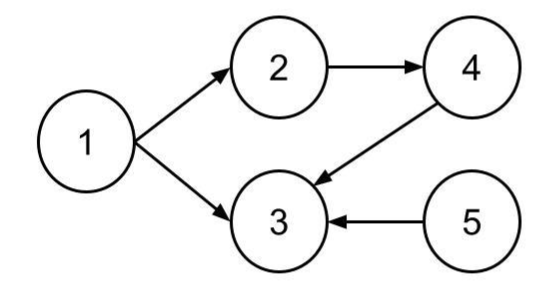  

①をスタート地点とする場合を考える。  
スタート地点は「訪問済み」とし、キューにスタート地点の都市番号を入れておく。  
訪問済み：①  
キュー：①  
カウント：1  
「訪問済み」となった場所にはしるしとしてマークを付けておく。  

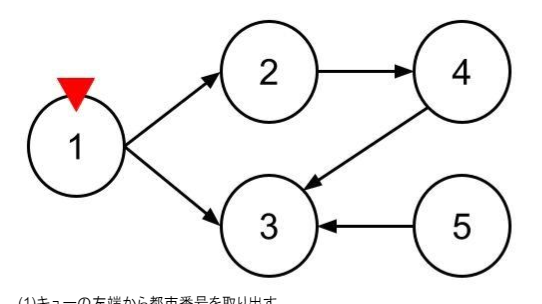  

(1)キューの左端から都市番号を取り出す  
キュー：①  
左端には①があるので①を取り出す。キューにあった①は取り出したので消える。  
(2)取り出した都市から行ける都市を確認する  
①からは②,③へ行ける。両方未訪問(マークがついていない)なので処理を行う。  
(2_1)ゴール地点としてカウント  
②,③をカウントする。(+2)  
カウント：3  
(2_2)訪問済みとする  
②,③にマークをつける。  
(2_3)キューへ追加  
キューへ②,③を追加する。  
キュー：②,③  

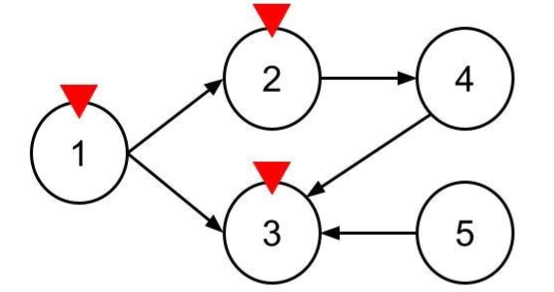  

(1)キューの左端から都市番号を取り出す  
キュー：②,③  
左端には②があるので②を取り出す。  
(2)取り出した都市から行ける都市を確認する  
②からは④へ行ける。未訪問(マークがついていない)なので処理を行う。  
(2_1)ゴール地点としてカウント  
④をカウントする。(+1)  
カウント：4  
(2_2)訪問済みとする  
④にマークをつける。  
(2_3)キューへ追加  
キューへ④を追加する。  
キュー：③,④  

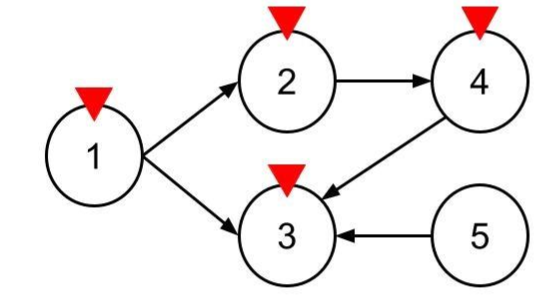  

(1)キューの左端から都市番号を取り出す  
キュー：③,④  
左端には③があるので③を取り出す。  
(2)取り出した都市から行ける都市を確認する  
③から行ける都市はないのでなにも処理をしない。  
(1)キューの左端から都市番号を取り出す  
キュー：④  
左端には④があるので④を取り出す。  
(2)取り出した都市から行ける都市を確認する  
④からは③へ行けるが、③はすでに訪問済みマークがついているから無視。  
ここでキューが空になったので終了。  
結局①をスタート地点として行ける都市は4つであることがわかった。  
あとはスタート地点を②,③,④,⑤として同様の処理を行えばよい。  
<br>

### [実装のコツ]
<道路の情報の受け取り>  
A,Bの情報を受け取る時、どの都市からどの都市へ行けるか？という情報を記録していく必要が  
ある。これは二次元配列として記録する。  
ひとまず(N+1)個のリストを入れたリスト、connectを用意し、A,Bを受け取ったらconnect[A]にBを追加していく。


```
connect = [[] for i in range(N+1)]
connect[A].append(B)
```

これで行ける都市が確認できる。例えば①から②,③,④へ行ける場合は  
connect[1]=[2,3,4]  
となっているわけだ。  
- deque  
dequeはリストのようなものだが、左端から要素を取り出す操作がO(1)でできる。  
※リストを使ってしまうとこの操作がO(N)かかるのでTLEする。  
dequeはライブラリcollectionsからインポートして使う。  
<br>
「使い方」  
・インポート：from collections import deque  
・作成：変数名=deque()  
・先頭(左端)に要素追加【O(1)】：変数名.appendleft(要素)  
・末尾(右端)に要素追加【O(1)】：変数名.append(要素)  
・先頭(左端)から要素を取り出して削除【O(1)】：変数名.popleft()  
・末尾(右端)から要素を取り出して削除【O(1)】：変数名.pop()  

<行ける都市の確認>  
connectで今いる都市から行ける都市を確認する。  
今いる都市(Now)から行ける都市(To)を順に処理する場合は以下のように書く。  

```
for To in connect[Now]:
```

In [ ]:
#入力の受け取り
N,M = map(int,input().split())

#道路の情報を格納するリスト
connect = [[] for _ in range(N+1)]

# M回受け取り
for i in range(M):
    #入力受け取り
    A,B = map(int,input().split())
    # connect[A]にBを追加する。
    #都市1から都市2,3,4に行けるならconnect[1] = 2, 3, 4
    connect[A].append(B)

#dequeのインポート
from collections import deque

#BFS
#引数:スタート都市 → 返り値:スタート都市からいける都市の数
def BFS(start):
    #行ける都市を数える変数
    #スタート都市→スタート都市は必ず行けるので
    count = 1
    
    #訪問済みの都市のリスト
    #訪問済みならTrue, 未訪問ならFalse
    visited = [False] * (N+1)
    
    #スタート都市は訪問済みにする。
    visited[start] = True
    
    #キューを用意
    que = deque()
    #キューへスタート都市を追加
    que.append(start)
    
    #キューが空になるまで
    while 0<len(que):
        #今いる都市
        now = que.popleft()
        
        #今いる都市からいける都市に順にtoへ
        for to in connect[now]:
            #もしtoが未訪問なら
            if visited[to] == False:
                #countにプラス1
                count += 1
                
                #toを訪問済みにする。
                visited[to] = True
                
                #キューへtoを追加
                que.append(to)
    return count

#答えを格納する変数
ans = 0

# x = 1~N
for x in range(1, N+1):
    ans += BFS(x)

print(ans)